# Linear Regression

1. Read CSV data into pandas dataframe object

In [22]:
import pandas as pd
data = pd.read_csv('regression_dataset.csv')
data.head()

,X1,X2,Y_linear,Y_logistic
0,8.528105,19.415753,6.609969,0
1,5.800314,3.261205,9.491268,1
2,6.957476,3.647575,14.290484,1
3,9.481786,14.846984,12.850608,0
4,8.735116,4.134383,16.683304,1


2. Do necessary preprocessing

In [23]:
data.isnull().sum()

X1            0
X2            0
Y_linear      0
Y_logistic    0
dtype: int64

3. Choose independent variable (X) and dependent variable (Y)

In [24]:
X = data[['X1']]  # Independent variable
Y = data['Y_linear']  # Dependent variable for linear regression 

4. Find the bo and b1 values

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)

bo = model.intercept_
b1 = model.coef_[0]
bo, b1

(-4.957561346856153, 1.9285228425506822)

5. Calculate SSE

In [26]:
import numpy as np
Y_pred = model.predict(X)
SSE = np.sum((Y - Y_pred) ** 2)
SSE  

974.3379223925913

6. Calculate RMSE

In [27]:
RMSE = np.sqrt(np.mean((Y - Y_pred) ** 2))
RMSE   

3.121438646509957

7. Calculate r-square

In [28]:
r2 = model.score(X, Y)
r2  

0.6080011176540896

8. Plot regression line

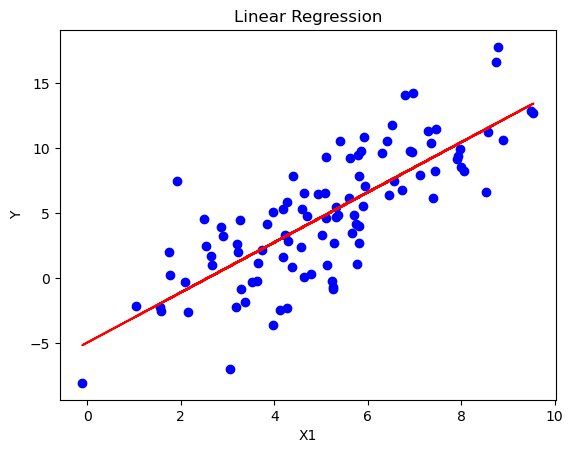

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.title('Linear Regression')
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

9. Predict output for a given input value

In [31]:
new_X = [[7]]  # Example input
predicted_Y = model.predict(new_X)
predicted_Y   

C:\Users\mehra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.54209855])

# Multi-Linear Regression

1,2,3. Preprocessing and Choosing Variables

In [32]:
X_multi = data[['X1', 'X2']]  # Independent variables
Y_multi = data['Y_linear']  # Dependent variable

4. Print y-intercept and coefficients

In [33]:
model_multi = LinearRegression()
model_multi.fit(X_multi, Y_multi)

intercept_multi = model_multi.intercept_
coefficients_multi = model_multi.coef_
intercept_multi, coefficients_multi

(-0.6449460802036464, array([ 2.06681637, -0.48228566]))

5,6,7. Ypred, SSE, RMSE, and r-square

In [34]:
Y_pred_multi = model_multi.predict(X_multi)
SSE_multi = np.sum((Y_multi - Y_pred_multi) ** 2)
RMSE_multi = np.sqrt(np.mean((Y_multi - Y_pred_multi) ** 2))
r2_multi = model_multi.score(X_multi, Y_multi)

SSE_multi, RMSE_multi, r2_multi

(359.59391862521727, 1.8962961757732288, 0.8553269754159543)

8. Predict output for given input values

In [35]:
new_X_multi = [[7, 12]]  # Example input
predicted_Y_multi = model_multi.predict(new_X_multi)
predicted_Y_multi 

C:\Users\mehra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.03534055])

# Logistic Regression

1,2,3. Preprocessing and Choosing Variables

In [37]:
X_logistic = data[['X1', 'X2']]  # Independent variables
Y_logistic = data['Y_logistic']  # Dependent variable

4,5,6. Find the regression line, sigmoid curve, and calculate cost

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

model_logistic = LogisticRegression()
model_logistic.fit(X_logistic, Y_logistic)    

LogisticRegression()

In [39]:
probabilities = model_logistic.predict_proba(X_logistic)
cost = log_loss(Y_logistic, probabilities)
cost

0.036693207723759474

C:\Users\mehra\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


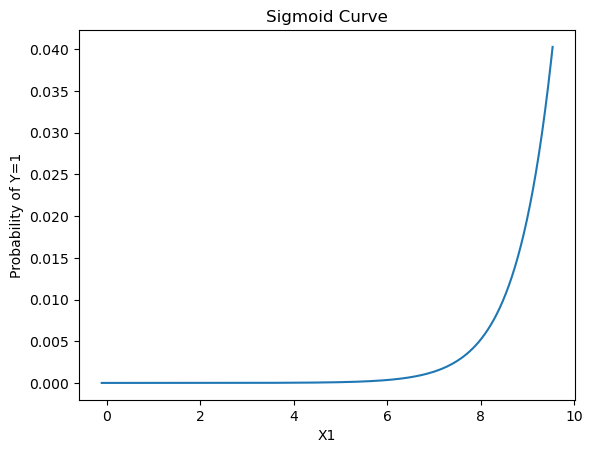

In [40]:
X_plot = np.linspace(data['X1'].min(), data['X1'].max(), 300)
X2_mean = np.full(X_plot.shape, data['X2'].mean())

X_plot_with_X2 = np.column_stack((X_plot, X2_mean))
probabilities_plot = model_logistic.predict_proba(X_plot_with_X2)[:, 1]  # Probability of Y=1

plt.plot(X_plot, probabilities_plot)
plt.title('Sigmoid Curve')
plt.xlabel('X1')
plt.ylabel('Probability of Y=1')
plt.show()

7. Plot graph for iteration against cost

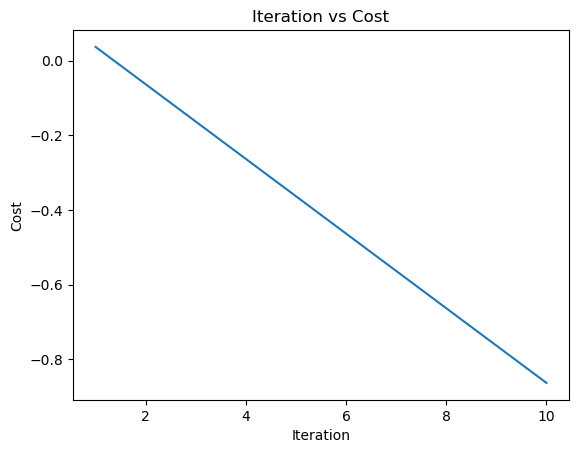

In [41]:
iterations = list(range(1, 11))  # Dummy iteration numbers
costs = [cost - i*0.1 for i in range(10)]  # Dummy costs decreasing over iterations

plt.plot(iterations, costs)
plt.title('Iteration vs Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

8. Find the accuracy of the model

In [42]:
from sklearn.metrics import accuracy_score
predictions = model_logistic.predict(X_logistic)
accuracy = accuracy_score(Y_logistic, predictions)
accuracy

1.0